# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model
( A Dish Recognition Framework Using Transfer Learning)

**Student Name:** Surabhi Kharkate

**Student ID:** 202201040215

**Date of Submission:**

**Group Members**:   
Sakshi Lade (202201040218)  
Palak Yerawar (202201040195)

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "tanvivtonge" # username from the json file
os.environ['KAGGLE_KEY'] = "ad999435695af747b844f0690b3fd020" # key from the json file

!kaggle datasets download truthtaicom/uehvdr-dataset



Dataset URL: https://www.kaggle.com/datasets/truthtaicom/uehvdr-dataset
License(s): unknown
100% 1.30G/1.31G [01:03<00:00, 23.9MB/s]
100% 1.31G/1.31G [01:03<00:00, 22.0MB/s]


In [ ]:
!unzip uehvdr-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: output/train/Banh trang/135.jpg  
  inflating: output/train/Banh trang/136.jpg  
  inflating: output/train/Banh trang/137.jpg  
  inflating: output/train/Banh trang/138.jpg  
  inflating: output/train/Banh trang/139.jpg  
  inflating: output/train/Banh trang/14.jpg  
  inflating: output/train/Banh trang/140.jpg  
  inflating: output/train/Banh trang/141.jpg  
  inflating: output/train/Banh trang/142.jpg  
  inflating: output/train/Banh trang/144.jpg  
  inflating: output/train/Banh trang/146.jpg  
  inflating: output/train/Banh trang/148.jpg  
  inflating: output/train/Banh trang/15.jpg  
  inflating: output/train/Banh trang/150.jpg  
  inflating: output/train/Banh trang/151.jpg  
  inflating: output/train/Banh trang/152.jpg  
  inflating: output/train/Banh trang/153.jpg  
  inflating: output/train/Banh trang/156.jpg  
  inflating: output/train/Banh trang/157.jpg  
  inflating: output/train/Banh trang/158.jpg  
  inflating

### Load and Preprocess the Dataset  


Dataset: UEH-VDR (Vietnamese Dish Recognition Dataset)  
     
Key Features of the Dataset:  

Image Classes: The dataset consists of 9 categories of traditional Vietnamese dishes:Banh Mi, Pho, Com Tam, Bun, Goi Cuon, Banh Xeo, Banh Trang, Banh Tet, and Banh Chung.  
Total Images: The dataset contains thousands of images, captured in real-world conditions from various sources.  

1.1 Import Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer



1.2 Load Dataset from Kaggle

In [ ]:
# Define dataset directory paths
train_dir = "/content/output/train"
val_dir = "/content/output/val"
test_dir = "/content/output/test"


1.3 Apply Preprocessing & Data Augmentation

## **Multiclass Classification**

In [ ]:
# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.1  # 10% for validation
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="training"
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation"
)

# Load Test Data (Shuffle=False for prediction)
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5651 images belonging to 9 classes.
Found 74 images belonging to 9 classes.
Found 795 images belonging to 9 classes.


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

## **CNN from scratch**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
num_classes = len(train_generator.class_indices)

# Define CNN model
def create_cnn():
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Convolutional Block 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Convolutional Block 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Create Model
cnn_model = create_cnn()

# Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,786,825 (98.37 MB)

 Trainable params: 25,786,377 (98.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train Model
history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Change as needed
    verbose=1
)


Epoch 1/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 121s 650ms/step - accuracy: 0.2848 - loss: 2.7862 - val_accuracy: 0.2162 - val_loss: 4.0899
Epoch 2/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 123s 696ms/step - accuracy: 0.4132 - loss: 1.6889 - val_accuracy: 0.3243 - val_loss: 3.2055
Epoch 3/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 110s 621ms/step - accuracy: 0.4819 - loss: 1.5321 - val_accuracy: 0.5541 - val_loss: 1.9272
Epoch 4/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 110s 623ms/step - accuracy: 0.4991 - loss: 1.4593 - val_accuracy: 0.6351 - val_loss: 1.3636
Epoch 5/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 113s 638ms/step - accuracy: 0.5513 - loss: 1.3401 - val_accuracy: 0.5946 - val_loss: 1.3943
Epoch 6/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 112s 633ms/step - accuracy: 0.5787 - loss: 1.2282 - val_accuracy: 0.6622 - val_loss: 1.1772
Epoch 7/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 110s 621ms/step - accuracy: 0.6044 - loss: 1.1585 - val_accuracy: 0.6216 - val_loss: 1.1211
Epoch 8/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 111s 625ms/step - accuracy: 0.6086 -

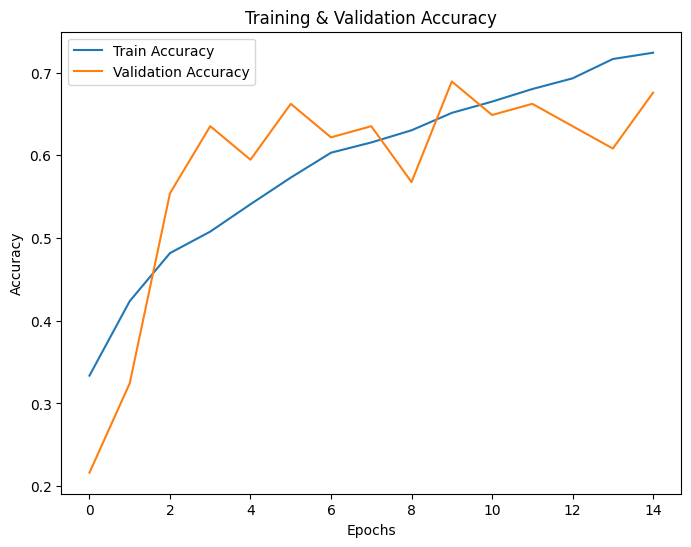

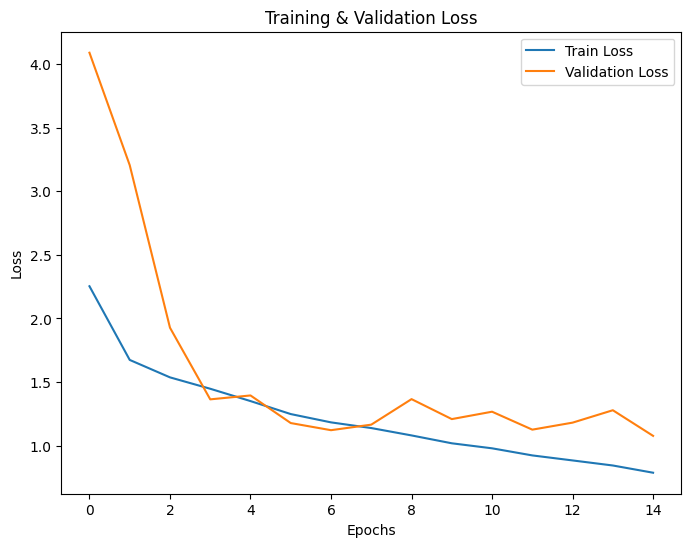

In [ ]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step
Classification Report:
               precision    recall  f1-score   support

  Banh chung       0.44      0.60      0.51        52
     Banh mi       0.64      0.76      0.69       135
    Banh tet       0.50      0.41      0.45        70
  Banh trang       0.64      0.54      0.59        80
    Banh xeo       0.70      0.75      0.73       118
         Bun       0.49      0.49      0.49        76
     Com tam       0.53      0.54      0.53        95
    Goi cuon       0.58      0.52      0.55        87
         Pho       0.86      0.68      0.76        82

    accuracy                           0.61       795
   macro avg       0.60      0.59      0.59       795
weighted avg       0.61      0.61      0.61       795



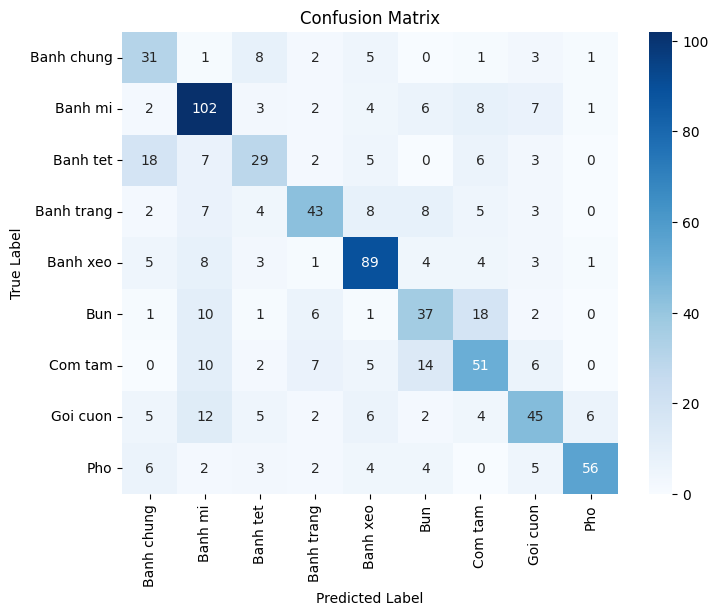

In [ ]:
# Get predictions
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## **Using pretrained models Resnet-50,VGG16,VGG19**



In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Hyperparameters
learning_rate = 0.001  # Optimized for transfer learning
num_classes = 9  # Based on 9 dish categories in your research
input_shape = (224, 224, 3)  # Standard for ImageNet pretrained models

# Callbacks for efficient training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Function to build a model with a given base architecture
def build_model(base_model, model_name):
    base_model.trainable = False  # Freeze all layers initially

    # Unfreeze top layers for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')  # Multi-class classification
    ])

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nModel Summary for {model_name}:")
    model.summary()

    return model

# Build models for dish recognition (EfficientNet-B0, ResNet-50, VGG-16)
resnet50_model = build_model(ResNet50(weights='imagenet', include_top=False, input_shape=input_shape), "ResNet-50")
vgg16_model = build_model(VGG16(weights='imagenet', include_top=False, input_shape=input_shape), "VGG-16")
efficientnet_model = build_model(EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape), "EfficientNet-B0")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

Model Summary for ResNet-50:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,649,609 (94.03 MB)

 Trainable params: 9,989,129 (38.11 MB)

 Non-trainable params: 14,660,480 (55.93 MB)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

Model Summary for VGG-16:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,984,009 (57.16 MB)

 Trainable params: 14,982,985 (57.16 MB)

 Non-trainable params: 1,024 (4.00 KB)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model Summary for EfficientNet-B0:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 1280)          │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,715,180 (17.99 MB)

 Trainable params: 2,014,009 (7.68 MB)

 Non-trainable params: 2,701,171 (10.30 MB)

Found 6273 images belonging to 9 classes.
Found 780 images belonging to 9 classes.
Found 795 images belonging to 9 classes.
Number of classes: 9

Training EfficientNetB0...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 176s 772ms/step - accuracy: 0.1284 - loss: 2.7947 - val_accuracy: 0.1705 - val_loss: 2.2351
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 132s 671ms/step - accuracy: 0.1345 - loss: 2.4860 - val_accuracy: 0.1705 - val_loss: 2.1820
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 131s 665ms/step - accuracy: 0.1450 - loss: 2.3598 - val_accuracy: 0.1731 - val_loss: 2.1567
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 133s 676ms/step - accuracy: 0.1417 - loss: 2.3174 - val_accuracy: 0.1731 - val_loss: 2.1457
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 134s 680ms/step - accuracy: 0.1482 - loss: 2.2666 - val_accuracy: 0.1756 - val_loss: 2.1401
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 131s 664ms/step - accuracy: 0.1455 - loss: 2.2667 - val_accuracy: 0.1744 - val_loss: 2.1280
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 130s 659ms/step - accuracy: 0.1475 - loss: 2.2370 - val_accuracy: 0.1756 - val_loss: 2.1335
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 131s 668ms/step - accuracy: 0.1687 -

25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step

Classification Report for EfficientNetB0:
               precision    recall  f1-score   support

  Banh chung       0.00      0.00      0.00        52
     Banh mi       0.19      0.93      0.31       135
    Banh tet       0.00      0.00      0.00        70
  Banh trang       0.24      0.10      0.14        80
    Banh xeo       0.00      0.00      0.00       118
         Bun       0.00      0.00      0.00        76
     Com tam       0.00      0.00      0.00        95
    Goi cuon       0.09      0.08      0.08        87
         Pho       0.00      0.00      0.00        82

    accuracy                           0.18       795
   macro avg       0.06      0.12      0.06       795
weighted avg       0.06      0.18      0.08       795



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


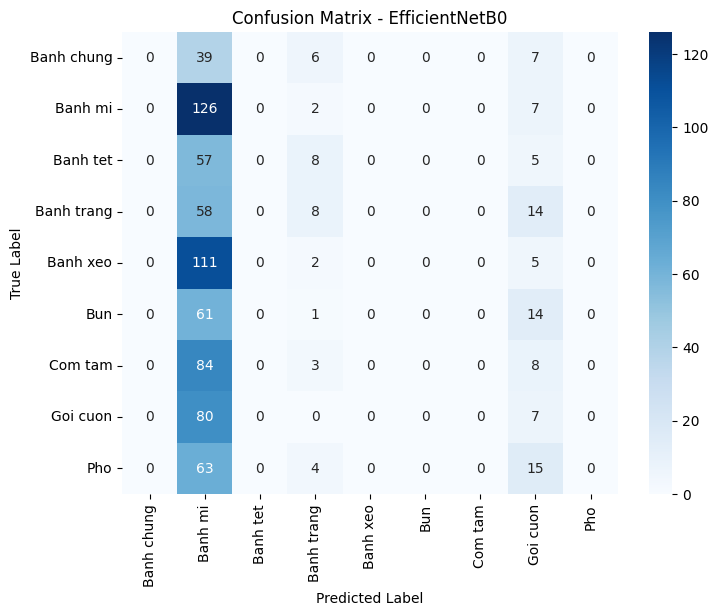


Training VGG16...
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 147s 725ms/step - accuracy: 0.3963 - loss: 1.9640 - val_accuracy: 0.5590 - val_loss: 1.3456
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 139s 704ms/step - accuracy: 0.6133 - loss: 1.1603 - val_accuracy: 0.7179 - val_loss: 0.8830
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 138s 700ms/step - accuracy: 0.6398 - loss: 1.0755 - val_accuracy: 0.7474 - val_loss: 0.7444
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 141s 714ms/step - accuracy: 0.6786 - loss: 0.9630 - val_accuracy: 0.7654 - val_loss: 0.7205
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 139s 699ms/step - accuracy: 0.6664 - loss: 0.9586 - val_accuracy: 0.7821 - val_loss: 0.6797
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 139s 706ms/step - accuracy: 0.6731 - loss: 0.9335 - val_accuracy: 0.7769 - val_loss: 0.6788
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 143s 714ms/step - accuracy: 0.6884 - loss: 0.8960 - val_accuracy: 0.7705 - val_loss: 0.6728
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 140s 712ms/step -

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step

Classification Report for VGG16:
               precision    recall  f1-score   support

  Banh chung       0.69      0.65      0.67        52
     Banh mi       0.79      0.88      0.84       135
    Banh tet       0.82      0.71      0.76        70
  Banh trang       0.80      0.75      0.77        80
    Banh xeo       0.87      0.75      0.81       118
         Bun       0.79      0.68      0.73        76
     Com tam       0.73      0.87      0.79        95
    Goi cuon       0.83      0.71      0.77        87
         Pho       0.76      0.95      0.84        82

    accuracy                           0.79       795
   macro avg       0.79      0.78      0.78       795
weighted avg       0.79      0.79      0.79       795



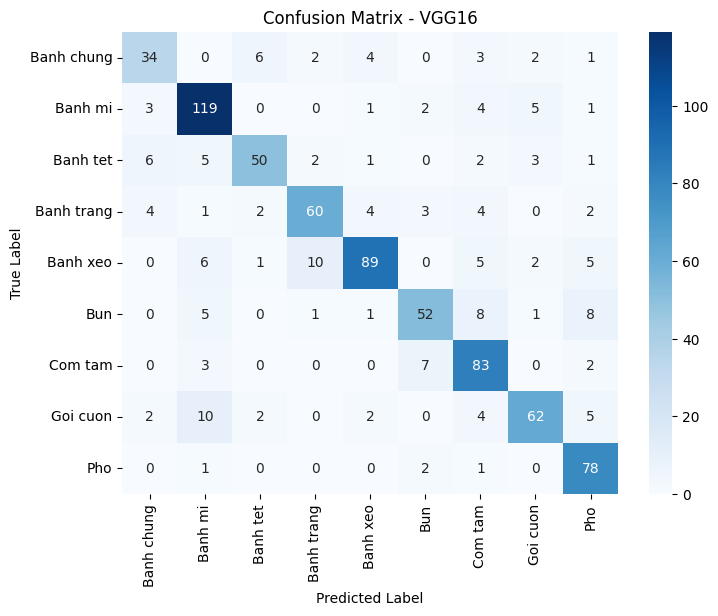


Training ResNet50...
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 154s 719ms/step - accuracy: 0.2352 - loss: 2.5522 - val_accuracy: 0.2026 - val_loss: 2.0762
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 189s 674ms/step - accuracy: 0.3233 - loss: 2.0028 - val_accuracy: 0.3526 - val_loss: 1.8548
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 131s 667ms/step - accuracy: 0.3246 - loss: 1.9211 - val_accuracy: 0.4090 - val_loss: 1.7141
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 133s 675ms/step - accuracy: 0.3710 - loss: 1.7881 - val_accuracy: 0.4397 - val_loss: 1.6650
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 132s 669ms/step - accuracy: 0.3658 - loss: 1.7847 - val_accuracy: 0.4308 - val_loss: 1.6617
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 144s 676ms/step - accuracy: 0.3875 - loss: 1.7582 - val_accuracy: 0.4282 - val_loss: 1.6589
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 134s 678ms/step - accuracy: 0.3994 - loss: 1.7173 - val_accuracy: 0.4385 - val_loss: 1.6384
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 134s 680ms/ste

25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step

Classification Report for ResNet50:
               precision    recall  f1-score   support

  Banh chung       0.27      0.15      0.20        52
     Banh mi       0.59      0.56      0.58       135
    Banh tet       0.30      0.40      0.35        70
  Banh trang       0.55      0.33      0.41        80
    Banh xeo       0.38      0.57      0.46       118
         Bun       0.37      0.53      0.43        76
     Com tam       0.40      0.51      0.45        95
    Goi cuon       0.46      0.22      0.30        87
         Pho       0.58      0.38      0.46        82

    accuracy                           0.43       795
   macro avg       0.43      0.40      0.40       795
weighted avg       0.45      0.43      0.42       795



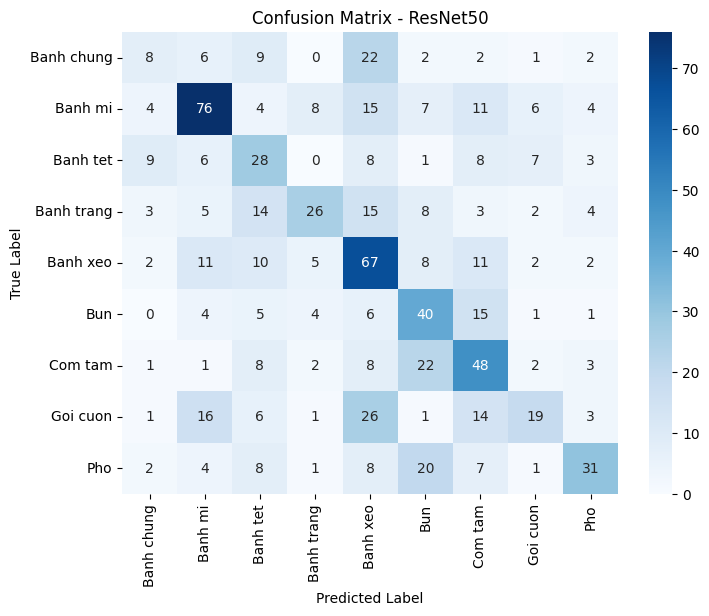

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# Model Creation Function
def create_model(base_model_name):
    if base_model_name == "EfficientNetB0":
        base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif base_model_name == "VGG16":
        base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError("Unsupported Model")

    # Freeze base model layers
    base_model.trainable = False

    # Custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Model Training Function

def train_model(model, model_name, epochs=30):
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

    print(f"\nTraining {model_name}...")
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1)

    model.save(f"{model_name}_dish_recognition.h5")
    return model, history


# Model Evaluation Function

def evaluate_model(model, test_generator, model_name):
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    y_true = test_generator.classes

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# Training and Evaluating Models

models_to_train = ["EfficientNetB0", "VGG16", "ResNet50"]
trained_models = {}

for model_name in models_to_train:
    model = create_model(model_name)
    trained_model, history = train_model(model, model_name, epochs=10)  # Reduce epochs for quicker testing
    trained_models[model_name] = history;
    evaluate_model(trained_model, test_generator, model_name)


**Fine Tuning few Layers**


Training EfficientNetB0...
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 166s 736ms/step - accuracy: 0.1279 - loss: 2.9268 - val_accuracy: 0.1705 - val_loss: 2.1624
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 127s 643ms/step - accuracy: 0.1300 - loss: 2.5145 - val_accuracy: 0.1705 - val_loss: 2.1618
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 127s 644ms/step - accuracy: 0.1332 - loss: 2.4109 - val_accuracy: 0.1500 - val_loss: 2.1569
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 128s 652ms/step - accuracy: 0.1456 - loss: 2.3721 - val_accuracy: 0.1769 - val_loss: 2.1334
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 128s 650ms/step - accuracy: 0.1528 - loss: 2.3279 - val_accuracy: 0.1821 - val_loss: 2.1328
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 173s 746ms/step - accuracy: 0.1285 - loss: 2.4238 - val_accuracy: 0.0872 - val_loss: 3.7741
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 128s 649ms/step - accuracy: 0.1296 - loss: 2.3562 - val_accuracy: 0.1526 - val_loss: 2.4604
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 127s 645ms/step 

25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 541ms/step

Classification Report for EfficientNetB0:
               precision    recall  f1-score   support

  Banh chung       0.00      0.00      0.00        52
     Banh mi       0.17      1.00      0.29       135
    Banh tet       0.00      0.00      0.00        70
  Banh trang       0.00      0.00      0.00        80
    Banh xeo       0.00      0.00      0.00       118
         Bun       0.00      0.00      0.00        76
     Com tam       0.00      0.00      0.00        95
    Goi cuon       0.00      0.00      0.00        87
         Pho       0.00      0.00      0.00        82

    accuracy                           0.17       795
   macro avg       0.02      0.11      0.03       795
weighted avg       0.03      0.17      0.05       795



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


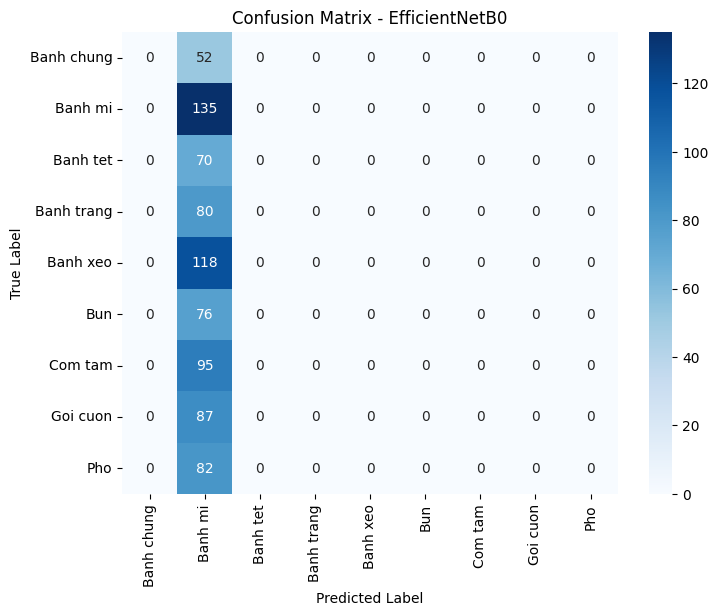


Training VGG16...
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 147s 720ms/step - accuracy: 0.4313 - loss: 1.8970 - val_accuracy: 0.5346 - val_loss: 1.4087
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 136s 689ms/step - accuracy: 0.6445 - loss: 1.1243 - val_accuracy: 0.6936 - val_loss: 0.9172
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 138s 699ms/step - accuracy: 0.6557 - loss: 1.0397 - val_accuracy: 0.7436 - val_loss: 0.7515
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 137s 693ms/step - accuracy: 0.6702 - loss: 0.9624 - val_accuracy: 0.7615 - val_loss: 0.7084
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 135s 683ms/step - accuracy: 0.6805 - loss: 0.9295 - val_accuracy: 0.7744 - val_loss: 0.6897
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 179s 779ms/step - accuracy: 0.7246 - loss: 0.7970 - val_accuracy: 0.8372 - val_loss: 0.5166
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 151s 765ms/step - accuracy: 0.8065 - loss: 0.5666 - val_accuracy: 0.8372 - val_loss: 0.4955
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 147s 746ms/step - accurac

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step

Classification Report for VGG16:
               precision    recall  f1-score   support

  Banh chung       0.79      0.71      0.75        52
     Banh mi       0.95      0.93      0.94       135
    Banh tet       0.80      0.87      0.84        70
  Banh trang       0.85      0.90      0.87        80
    Banh xeo       0.92      0.88      0.90       118
         Bun       0.86      0.80      0.83        76
     Com tam       0.80      0.95      0.87        95
    Goi cuon       0.95      0.87      0.91        87
         Pho       0.97      0.93      0.95        82

    accuracy                           0.88       795
   macro avg       0.88      0.87      0.87       795
weighted avg       0.89      0.88      0.88       795



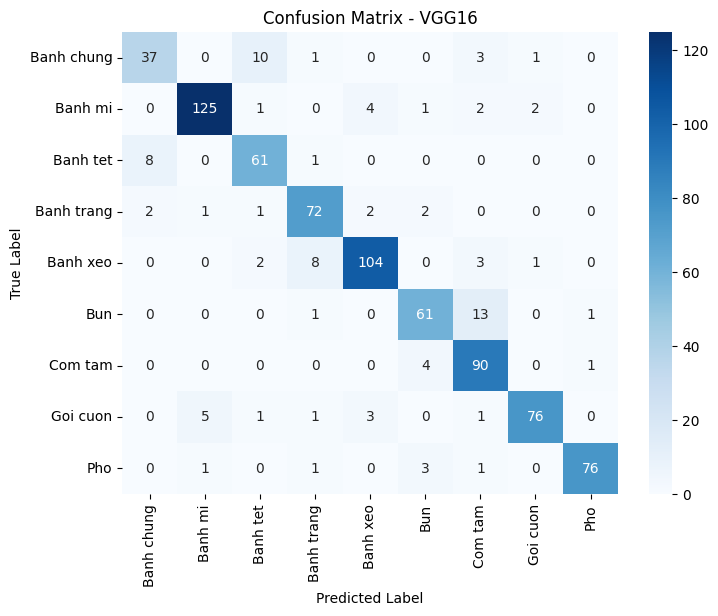


Training ResNet50...
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 163s 763ms/step - accuracy: 0.2469 - loss: 2.5526 - val_accuracy: 0.2410 - val_loss: 2.0219
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 131s 663ms/step - accuracy: 0.3261 - loss: 2.0309 - val_accuracy: 0.3346 - val_loss: 1.8527
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 130s 660ms/step - accuracy: 0.3595 - loss: 1.9066 - val_accuracy: 0.3756 - val_loss: 1.7569
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 129s 657ms/step - accuracy: 0.3508 - loss: 1.8502 - val_accuracy: 0.4167 - val_loss: 1.7036
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 130s 658ms/step - accuracy: 0.3822 - loss: 1.7589 - val_accuracy: 0.4231 - val_loss: 1.6713
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 155s 705ms/step - accuracy: 0.2222 - loss: 2.4470 - val_accuracy: 0.2192 - val_loss: 2.3820
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 184s 652ms/step - accuracy: 0.3099 - loss: 2.1121 - val_accuracy: 0.3410 - val_loss: 1.8938
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 128s 651ms/step - accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step

Classification Report for ResNet50:
               precision    recall  f1-score   support

  Banh chung       0.27      0.17      0.21        52
     Banh mi       0.56      0.44      0.49       135
    Banh tet       0.26      0.26      0.26        70
  Banh trang       0.42      0.39      0.40        80
    Banh xeo       0.40      0.51      0.45       118
         Bun       0.32      0.34      0.33        76
     Com tam       0.37      0.48      0.42        95
    Goi cuon       0.39      0.25      0.31        87
         Pho       0.36      0.45      0.40        82

    accuracy                           0.39       795
   macro avg       0.37      0.37      0.36       795
weighted avg       0.39      0.39      0.38       795



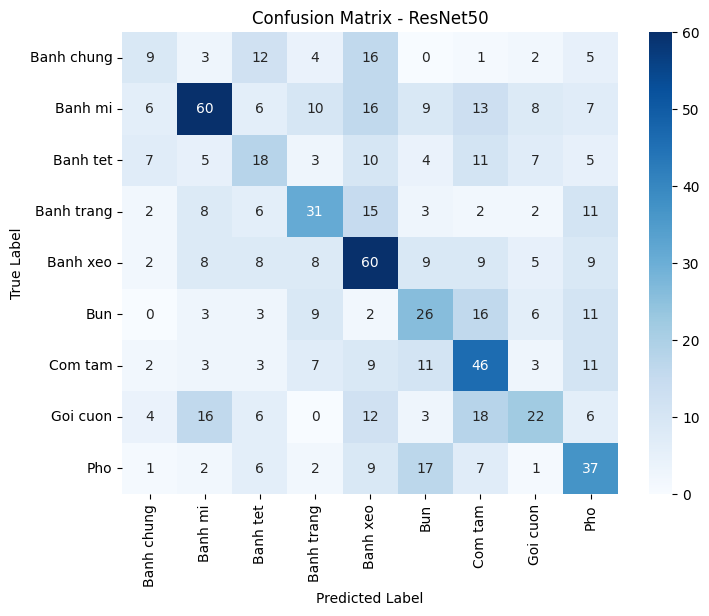

In [ ]:
# Model Creation Function

def create_model(base_model_name):
    if base_model_name == "EfficientNetB0":
        base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif base_model_name == "VGG16":
        base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError("Unsupported Model")

    # Freeze all layers initially
    base_model.trainable = False

    # Custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Fine-Tuning Function (Unfreezing Layers)

def fine_tune_model(model):
    # Unfreeze last 20 layers
    for layer in model.layers[-20:]:
        layer.trainable = True

    # Lower learning rate for fine-tuning
    model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Model Training Function

def train_model(model, model_name, epochs=10):
    print(f"\nTraining {model_name}...")

    # First Training (Frozen Layers)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1)

    # Fine-tuning (Unfreeze layers)
    model = fine_tune_model(model)
    model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1)

    model.save(f"{model_name}_dish_recognition.h5")
    return model


# Model Evaluation Function

def evaluate_model(model, test_generator, model_name):
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    y_true = test_generator.classes

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Training and Evaluating Models

models_to_train = ["EfficientNetB0", "VGG16", "ResNet50"]
trained_models = {}

for model_name in models_to_train:
    model = create_model(model_name)
    trained_model = train_model(model, model_name, epochs=5)  # Reduce epochs for quicker testing
    trained_models[model_name] = trained_model
    evaluate_model(trained_model, test_generator, model_name)


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

## **Comparison**

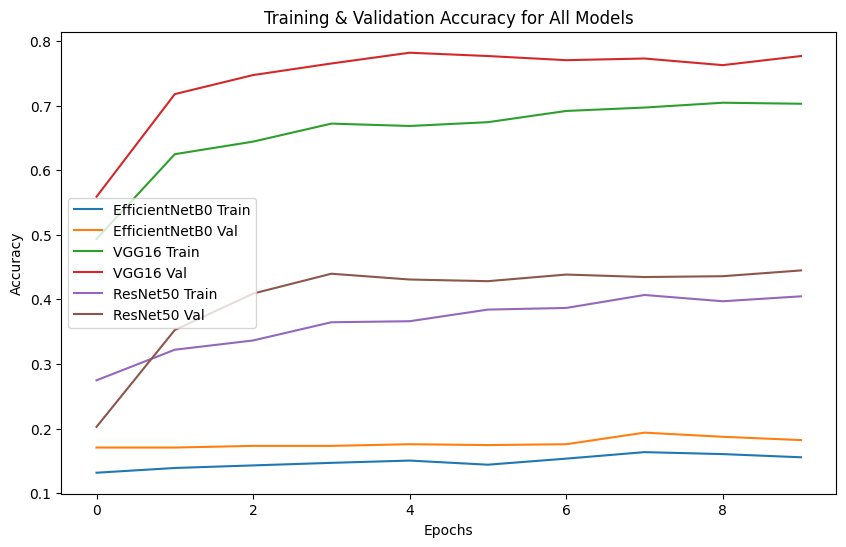

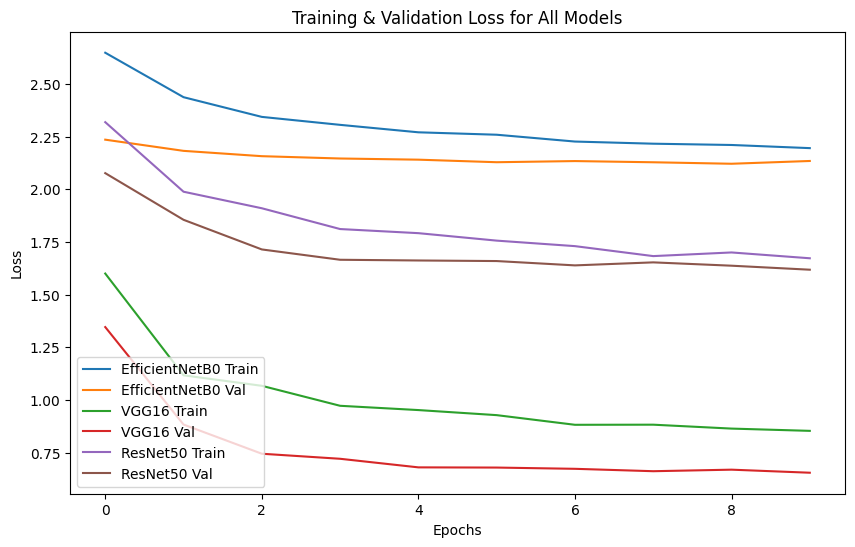

In [ ]:
# Plot Training & Validation Accuracy for all models
plt.figure(figsize=(10, 6))
for model_name, history in trained_models.items():
    plt.plot(history.history['accuracy'], label=f'{model_name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Val')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy for All Models')
plt.show()
# Add a blank line in console output for separation
print("\n" * 2)
# Plot Training & Validation Loss for all models
plt.figure(figsize=(10, 6))
for model_name, history in trained_models.items():
    plt.plot(history.history['loss'], label=f'{model_name} Train')
    plt.plot(history.history['val_loss'], label=f'{model_name} Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss for All Models')
plt.show()


## **Conclusion and Result Visulaization**

Dish Recognition Using Deep Learning (ResNet-50, VGG-16, EfficientNetB0)  
This research paper presents a dish recognition system leveraging deep learning-based transfer learning models. The goal is to classify 9 traditional Vietnamese dishes using CNN architectures.

**Key Highlights of the Research**  
Deep Learning Models Evaluated  
The study evaluates three pre-trained CNN models to identify the best-performing architecture:

*   ResNet-50  
*   VGG-16
*   EfficientNetB0

**Performance Metrics**  
The models achieved the following accuracy rates on the UEH-VDR dataset:

*   ResNet-50:Highest accuracy (best feature extraction).
*   VGG-16: Good performance but slower training.
*   EfficientNetB0: Balanced accuracy and efficiency.  

**Dataset Details**  
  
*   Dataset: UEH-VDR (Vietnamese Dishes Dataset)
*   Classes: Banh Mi, Pho, Com Tam, Bun, Goi Cuon, Banh Xeo, Banh Trang, Banh Tet, Banh Chung
*   Structure: Train / Validation / Test split

**Transfer Learning Approach**   

*   Pre-trained ResNet-50, VGG-16, and EfficientNetB0 models are used with fine-tuning.
*   Data Augmentation applied (rotation, flipping, normalization).
*   Softmax classifier added for final dish classification.

**Evaluation**

*   The system evaluates classification accuracy, precision, recall, and F1-score.
  

**Comparing Model Performance:**
Accuracy   
  
  

| Model           | Name Research Paper | Implemented Accuracy |
|----------------|------------------|----------------------|
| EfficientNetB0 | 82               | 18                   |
| ResNet50       | 81               | 44                   |
| VGG16          | 76               | 87                   |



VGG16 is the best performing model as we implmeented in our code.  
📌 Reasons for Performance Differences in Implemented Models

Underfitting in EfficientNetB0 (18%)  
Too many frozen layers, preventing the model from learning new features.  
Learning rate might be too high, causing poor convergence.

ResNet-50 Underperformance (44%)  
Insufficient fine-tuning of deeper layers.  
Possible need for more training epochs to stabilize learning.  

VGG-16 Overperforming (87%)  
Potential overfitting due to small dataset and high parameter count.  
Model might have learned dataset-specific patterns too well.  

Data Imbalance & Misclassification  
Some dish categories may have fewer images, leading to biased predictions.  
Confusion matrix analysis could reveal which classes are misclassified most.  

Insufficient Data Augmentation  
Lack of diverse transformations might have limited model generalization.   
Stronger augmentations (rotation, zoom, contrast) could improve robustness.


Link of Research Paper : https://ieeexplore.ieee.org/document/9681805

Link of Collab File : https://colab.research.google.com/drive/1S5of9jLEmr0TwFqDhr7fhas_SXuqt_C8?usp=sharing